In [1]:
!which python

/home/utente/bahamas_test/bin/python


In [13]:
import yaml 
import corner
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# This is the configuration file
config_file = '../template/config.yaml'
with open(config_file, 'r') as file:
    config = yaml.safe_load(file)
    
print("We are using the following configuration:")
print(yaml.dump(config, default_flow_style=False))

We are using the following configuration:
T: 31557600.0
dt: 10
f1: 0.0001
f2: 0.029
file: ../data/data_whittle
fileAV: ../data/data_gamma
folder_plot: ../data/
gen2: true
inference:
  adapt_matrix: true
  beta: 1
  chain_method: parallel
  chains: 1
  file: ../data/data_gamma
  file_post: ../data/result_gamma.npz
  likelihood: Gamma
  sampler: NUTS
  samples: 4000
  warmup: 1000
mod: log
nseg: 2000
response_num: false



In [85]:
# This is the sources file
sources_file = '../template/pe_galaxy_stat.yaml'
with open(sources_file, 'r') as file:
    sources = yaml.safe_load(file)

print("We are using the following sources:")
print(yaml.dump(sources, default_flow_style=False))

#Extract injected parameters
par = []
for key in sources['sources']: 
    # Extract the injected parameters
    for i in range(len(sources['sources'][key])):
        print(f"Injected parameter {i}: {sources['sources'][key][i]['injected']}")
        par.append(sources['sources'][key][i]['injected'])
# Convert to numpy array
par = np.array(par)
  


We are using the following sources:
sources:
  instr_noise:
  - bounds:
    - 1
    - 5
    injected: 2.4
    name: A
  - bounds:
    - 3
    - 10
    injected: 7.9
    name: P
  power_law:
  - bounds:
    - -15
    - -8
    injected: -10.3
    name: Amp
  - bounds:
    - -3
    - 3
    injected: 0.67
    name: slope

Injected parameter 0: 2.4
Injected parameter 1: 7.9
Injected parameter 0: -10.3
Injected parameter 1: 0.67


In [98]:
!bahamas_data --config ../template/config.yaml --sources ../template/pe_galaxy_stat.yaml

/home/utente/anaconda3/lib/python3.9/pty.py:85: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


Backend initialized with JAX
np is from: jax.numpy
2025-06-20 17:08:17,125 - BAHAMAS - INFO - Production of full resolution series
2025-06-20 17:08:17,125 - BAHAMAS - INFO - Production of full resolution series
2025-06-20 17:09:01,570 - BAHAMAS - INFO - Data saved in ../data/data_whittle.h5 and ../data/data_gamma.h5
2025-06-20 17:09:01,570 - BAHAMAS - INFO - Data saved in ../data/data_whittle.h5 and ../data/data_gamma.h5
2025-06-20 17:09:01,571 - BAHAMAS - INFO - Plotting signals.
2025-06-20 17:09:01,571 - BAHAMAS - INFO - Plotting signals.
2025-06-20 17:09:19,593 - BAHAMAS - INFO - SNR of power_law: 1252
2025-06-20 17:09:19,593 - BAHAMAS - INFO - SNR of power_law: 1252
2025-06-20 17:09:19,594 - BAHAMAS - INFO - Processing completed.
2025-06-20 17:09:19,594 - BAHAMAS - INFO - Processing completed.


In [99]:
!bahamas_inference --config ../template/config.yaml --sources ../template/pe_galaxy_stat.yaml

Backend initialized with JAX
np is from: jax.numpy
2025-06-20 17:09:27,083 - BAHAMAS_Inference - INFO - JAX devices available: [CpuDevice(id=0)]
2025-06-20 17:09:27,083 - BAHAMAS_Inference - INFO - Running inference with config: ../template/config.yaml and sources: ../template/pe_galaxy_stat.yaml
2025-06-20 17:09:27,084 - BAHAMAS_Inference - INFO - Running inference...
Number of chunks: 1
sample: 100%|█| 5000/5000 [00:23<00:00, 209.08it/s, 79 steps of size 5.58e-02. a
2025-06-20 17:09:58,884 - BAHAMAS_Inference - INFO - Inference completed successfully.
2025-06-20 17:09:58,884 - BAHAMAS_Inference - INFO - Results saved to: ../data/result_gamma.npz


Posterior samples loaded from: {'chain': {'instr_noise_A': Array([2.4019592, 2.4021404, 2.404732 , ..., 2.4047601, 2.407344 ,
       2.3980095], dtype=float32), 'instr_noise_P': Array([7.8969364, 7.897154 , 7.891959 , ..., 7.8962126, 7.8912706,
       7.905637 ], dtype=float32), 'power_law_Amp': Array([-10.296082, -10.296604, -10.285799, ..., -10.264529, -10.285696,
       -10.304727], dtype=float32), 'power_law_slope': Array([0.6720202 , 0.6720152 , 0.67502546, ..., 0.68454826, 0.67603385,
       0.6678167 ], dtype=float32), 'log_likelihood': Array([158095.05, 158094.62, 158094.42, ..., 158094.03, 158094.78,
       158093.78], dtype=float32), 'beta': 1}, 'autocorr': array([[ 1.        ,  1.        ,  1.        ,  1.        ],
       [ 0.45900528,  0.34427547,  0.59505555,  0.59965535],
       [ 0.24731675,  0.18790122,  0.37582149,  0.37838563],
       ...,
       [-0.13925052, -0.65332699, -0.15417742, -0.09115401],
       [ 0.02792057,  0.02702553,  0.01629007,  0.00416196],
       

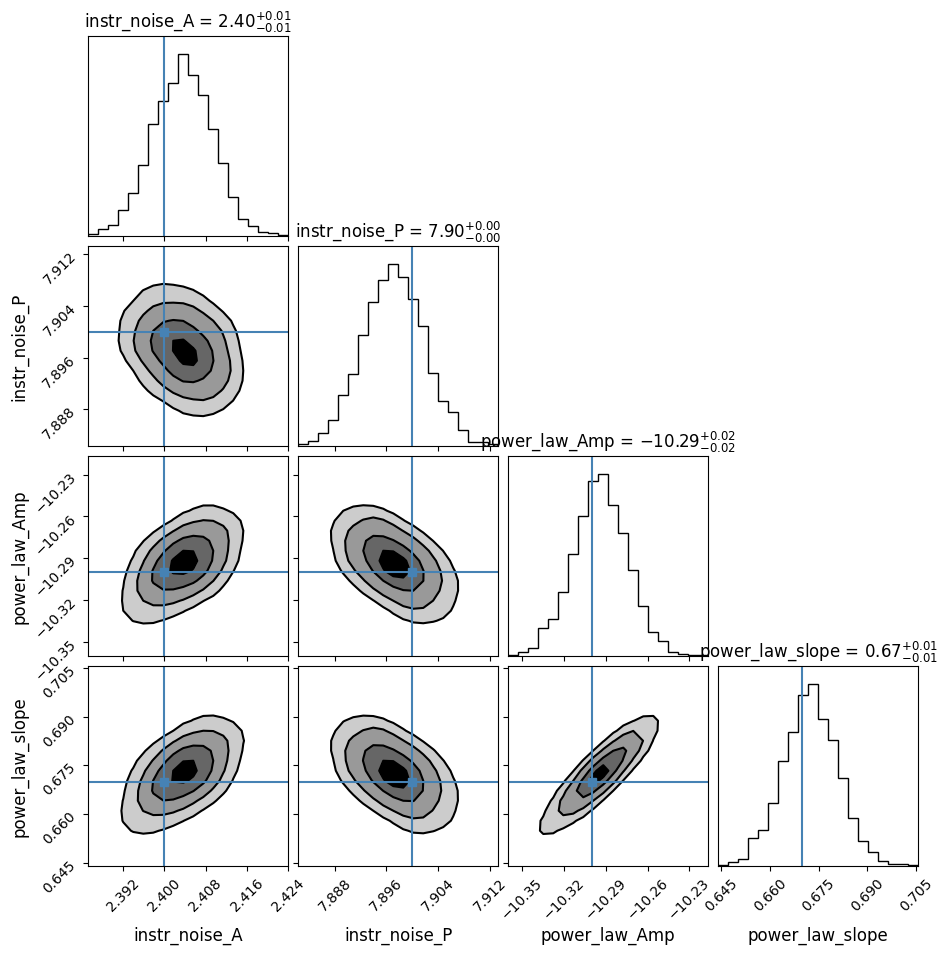

In [100]:
import corner

# Load the results from the inference
results = config['inference']['file_post']
posterior = np.load(results, allow_pickle=True)['posterior'][()]
print("Posterior samples loaded from:", posterior)

param_names = []
param_values = []


for key in posterior['chain'].keys():
  
    if key == 'log_likelihood':
        break
    else:
        param_names.append(key)
        param_values.append(posterior['chain'][key])
print("Parameters found in the posterior:", param_names)
# Stack the parameters into an array for corner
samples = np.vstack(param_values).T  # Shape: (n_samples, n_params)

# Plot corner plot
figure = corner.corner(samples, labels=param_names, show_titles=True, smooth=True, fill_contours=True, truths=par,
                      plot_datapoints=False, title_kwargs={"fontsize": 12}, label_kwargs={"fontsize": 12})

plt.show()